In [ ]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split



In [ ]:
data = pd.read_csv("Restaurant_Reviews-1.tsv",delimiter ="\t")
review=data['Review']
sentiment=data['Liked']
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
import string
def preprocess(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  text=text.lower()
  return text

review=review.apply(preprocess)

In [ ]:
type(review)
type(sentiment)

pandas.core.series.Series

In [ ]:
df = pd.DataFrame({'review': review, 'sentiment': sentiment})

In [ ]:
df.head()

,review,sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [ ]:
X,y = df['review'].values,df['sentiment'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (750,)
shape of test data is (250,)


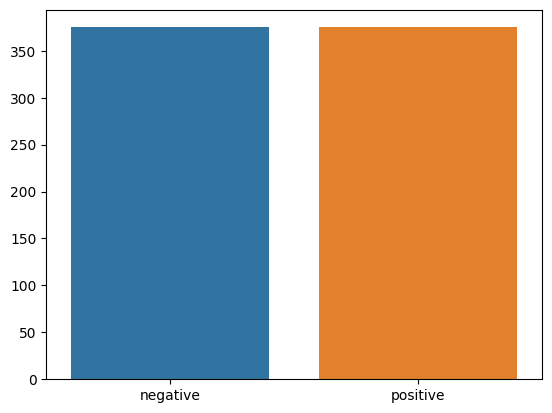

In [ ]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

In [ ]:
review

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: Review, Length: 1000, dtype: object

In [ ]:
x_train

array(['the jalapeno bacon is soooo good', 'this is a good joint',
       'definitely a turn off for me  i doubt ill be back unless someone else is buying',
       'would come back again if i had a sushi craving while in vegas',
       'the service was poor and thats being nice', 'i loved it',
       'i guess maybe we went on an off night but it was disgraceful',
       'i think this restaurant suffers from not trying hard enough',
       'for that price i can think of a few place i would have much rather gone',
       'server did a great job handling our large rowdy table',
       'their menu is diverse and reasonably priced',
       'not a single employee came out to see if we were ok or even needed a water refill once they finally served us our food',
       'the food is good',
       'i also had to taste my moms multigrain pumpkin pancakes with pecan butter and they were amazing fluffy and delicious',
       'talk about great customer service of course we will be back',
       'the

In [ ]:
    words=[]
    for i in x_train:
      text=i.split()
      for j in text:
        words.append(j)

In [ ]:


    corpus = Counter(words)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    len(corpus)

1739

In [ ]:
onehot_dict

{'the': 1,
 'and': 2,
 'i': 3,
 'was': 4,
 'a': 5,
 'to': 6,
 'is': 7,
 'this': 8,
 'it': 9,
 'not': 10,
 'food': 11,
 'for': 12,
 'in': 13,
 'of': 14,
 'place': 15,
 'good': 16,
 'service': 17,
 'very': 18,
 'back': 19,
 'that': 20,
 'my': 21,
 'with': 22,
 'had': 23,
 'great': 24,
 'were': 25,
 'be': 26,
 'you': 27,
 'so': 28,
 'we': 29,
 'but': 30,
 'have': 31,
 'here': 32,
 'at': 33,
 'are': 34,
 'on': 35,
 'they': 36,
 'go': 37,
 'all': 38,
 'will': 39,
 'like': 40,
 'if': 41,
 'our': 42,
 'best': 43,
 'an': 44,
 'time': 45,
 'there': 46,
 'just': 47,
 'really': 48,
 'would': 49,
 'again': 50,
 'dont': 51,
 'as': 52,
 'nice': 53,
 'restaurant': 54,
 'your': 55,
 'never': 56,
 'also': 57,
 'amazing': 58,
 'been': 59,
 'only': 60,
 'ever': 61,
 'their': 62,
 'one': 63,
 'delicious': 64,
 'up': 65,
 'friendly': 66,
 'no': 67,
 'by': 68,
 'vegas': 69,
 'from': 70,
 'going': 71,
 'pretty': 72,
 'when': 73,
 'definitely': 74,
 'did': 75,
 'out': 76,
 'or': 77,
 'us': 78,
 'its': 79,
 's

In [ ]:
x_train[0]

'the jalapeno bacon is soooo good'

In [ ]:
train=[]
test=[]

for i in x_train:
  text=i.split()
  lt=[]
  for j in text:
    if j in onehot_dict.keys():
      lt.append(onehot_dict[j])
  train.append(lt)

train


[[1, 723, 341, 7, 469, 16],
 [8, 7, 5, 16, 724],
 [74, 5, 725, 201, 12, 112, 3, 470, 172, 26, 19, 342, 279, 343, 7, 726],
 [49, 137, 19, 50, 41, 3, 23, 5, 152, 727, 173, 13, 69],
 [1, 17, 4, 280, 2, 728, 93, 53],
 [3, 153, 9],
 [3, 471, 344, 29, 154, 35, 44, 201, 125, 30, 9, 4, 729],
 [3, 87, 8, 54, 730, 70, 10, 731, 202, 155],
 [12, 20, 174, 3, 103, 87, 14, 5, 175, 15, 3, 49, 31, 88, 345, 472],
 [113, 75, 5, 24, 281, 732, 42, 282, 733, 203],
 [62, 94, 7, 734, 2, 473, 474],
 [10,
  5,
  475,
  735,
  95,
  76,
  6,
  283,
  41,
  29,
  25,
  346,
  77,
  96,
  476,
  5,
  477,
  736,
  204,
  36,
  478,
  237,
  78,
  42,
  11],
 [1, 11, 7, 16],
 [3,
  57,
  23,
  6,
  156,
  21,
  737,
  738,
  739,
  740,
  22,
  741,
  742,
  2,
  36,
  25,
  58,
  743,
  2,
  64],
 [347, 104, 24, 238, 17, 14, 348, 29, 39, 26, 19],
 [1, 205, 4, 176, 1, 114, 97, 479, 13, 744, 4, 349],
 [137, 745, 350, 206, 2, 480],
 [8, 15, 351, 352],
 [18, 16, 353],
 [204, 55, 11, 746, 79, 481],
 [1, 17, 4, 747, 3, 

In [ ]:

encoded_train = [1 if label =='positive' else 0 for label in y_train]
y_train_list = y_train.tolist()
print(type(y_train_list))
y_train_list

<class 'list'>


[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [ ]:
def tockenize(x_train,y_train,x_val,y_val):

    # get all words from review and add it to word_list
    words=[]
    for i in x_train:
      text=i.split()
      for j in text:
        words.append(j)

    corpus = Counter(words)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tockenize
    train=[]
    test=[]

    for i in x_train:
      text=i.split()
      lt=[]
      for j in text:
        if j in onehot_dict.keys():
          lt.append(onehot_dict[j])
      train.append(lt)

    for i in x_val:
      text=i.split()
      lti=[]
      for j in text:
        if j in onehot_dict.keys():
          lti.append(onehot_dict[j])
      test.append(lti)

    return np.array(train), np.array(y_train),np.array(test), np.array(y_val),onehot_dict

In [ ]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)

<ipython-input-17-8d4699d0d5fb>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(train), np.array(y_train),np.array(test), np.array(y_val),onehot_dict


In [ ]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


In [ ]:
x_train

array([list([1, 723, 341, 7, 469, 16]), list([8, 7, 5, 16, 724]),
       list([74, 5, 725, 201, 12, 112, 3, 470, 172, 26, 19, 342, 279, 343, 7, 726]),
       list([49, 137, 19, 50, 41, 3, 23, 5, 152, 727, 173, 13, 69]),
       list([1, 17, 4, 280, 2, 728, 93, 53]), list([3, 153, 9]),
       list([3, 471, 344, 29, 154, 35, 44, 201, 125, 30, 9, 4, 729]),
       list([3, 87, 8, 54, 730, 70, 10, 731, 202, 155]),
       list([12, 20, 174, 3, 103, 87, 14, 5, 175, 15, 3, 49, 31, 88, 345, 472]),
       list([113, 75, 5, 24, 281, 732, 42, 282, 733, 203]),
       list([62, 94, 7, 734, 2, 473, 474]),
       list([10, 5, 475, 735, 95, 76, 6, 283, 41, 29, 25, 346, 77, 96, 476, 5, 477, 736, 204, 36, 478, 237, 78, 42, 11]),
       list([1, 11, 7, 16]),
       list([3, 57, 23, 6, 156, 21, 737, 738, 739, 740, 22, 741, 742, 2, 36, 25, 58, 743, 2, 64]),
       list([347, 104, 24, 238, 17, 14, 348, 29, 39, 26, 19]),
       list([1, 205, 4, 176, 1, 114, 97, 479, 13, 744, 4, 349]),
       list([137, 745, 35

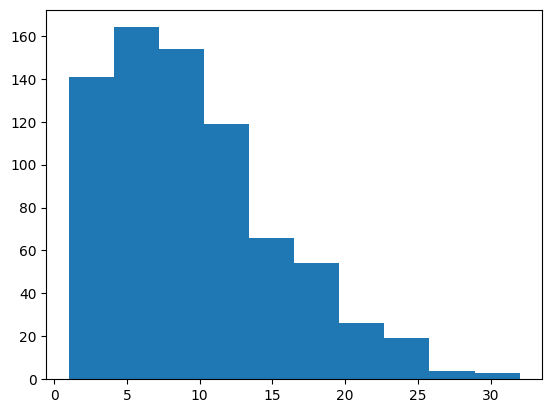

count    750.000000
mean       9.866667
std        5.717033
min        1.000000
25%        5.000000
50%        9.000000
75%       13.000000
max       32.000000
dtype: float64

In [ ]:
from matplotlib import pyplot as plt
rev_len = [len(i) for i in x_train]
plt.hist(rev_len, bins=10)
plt.show()
pd.Series(rev_len).describe()

In [ ]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

x_train_pad = padding_(x_train,30)
x_test_pad = padding_(x_test,30)

In [ ]:
x_train_pad

array([[  0,   0,   0, ...,   7, 469,  16],
       [  0,   0,   0, ...,   5,  16, 724],
       [  0,   0,   0, ..., 343,   7, 726],
       ...,
       [  0,   0,   0, ...,  11,   4, 228],
       [  0,   0,   0, ...,   3, 184, 701],
       [  0,   0,   0, ...,  29, 277,  12]])

In [ ]:
x_test_pad

array([[  0,   0,   0, ...,  34,  28,  66],
       [  0,   0,   0, ...,  25,   2,  64],
       [  0,   0,   0, ...,  40,   8,  15],
       ...,
       [  0,   0,   0, ...,  14,   5, 284],
       [  0,   0,   0, ...,   8,  15,   6],
       [  0,   0,   0, ...,   3, 111,  21]])

In [ ]:
batch_size=50

In [ ]:
tdata=TensorDataset(torch.from_numpy(x_train_pad),torch.from_numpy(y_train))

In [ ]:
train_loader = DataLoader(tdata, shuffle=True, batch_size=batch_size)

In [ ]:
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

In [ ]:
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 30])
Sample input: 
 tensor([[  0,   0,   0,  ...,  78, 190, 115],
        [  0,   0,   0,  ..., 122, 312, 300],
        [  0,   0,   0,  ..., 104,   8,  15],
        ...,
        [  0,   0,   0,  ...,   3, 153,   9],
        [  0,   0,   0,  ...,  36, 157,   5],
        [  0,   0,   0,  ..., 771, 772, 180]])
Sample input: 
 tensor([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1])


In [ ]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden



    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden


In [ ]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [ ]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()



    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '/content/model/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.6914813240369161 val_loss : 0.6793291687965393
train_accuracy : 52.53333333333333 val_accuracy : 60.8
Validation loss decreased (inf --> 0.679329).  Saving model ...
Epoch 2
train_loss : 0.6469690442085266 val_loss : 0.6415186762809754
train_accuracy : 62.53333333333333 val_accuracy : 64.8
Validation loss decreased (0.679329 --> 0.641519).  Saving model ...
Epoch 3
train_loss : 0.5614277283350627 val_loss : 0.5923348188400268
train_accuracy : 72.66666666666667 val_accuracy : 68.8
Validation loss decreased (0.641519 --> 0.592335).  Saving model ...
Epoch 4
train_loss : 0.47720083594322205 val_loss : 0.582712709903717
train_accuracy : 77.86666666666666 val_accuracy : 68.8
Validation loss decreased (0.592335 --> 0.582713).  Saving model ...
Epoch 5
train_loss : 0.39166476726531985 val_loss : 0.6622429847717285
train_accuracy : 82.39999999999999 val_accuracy : 68.8


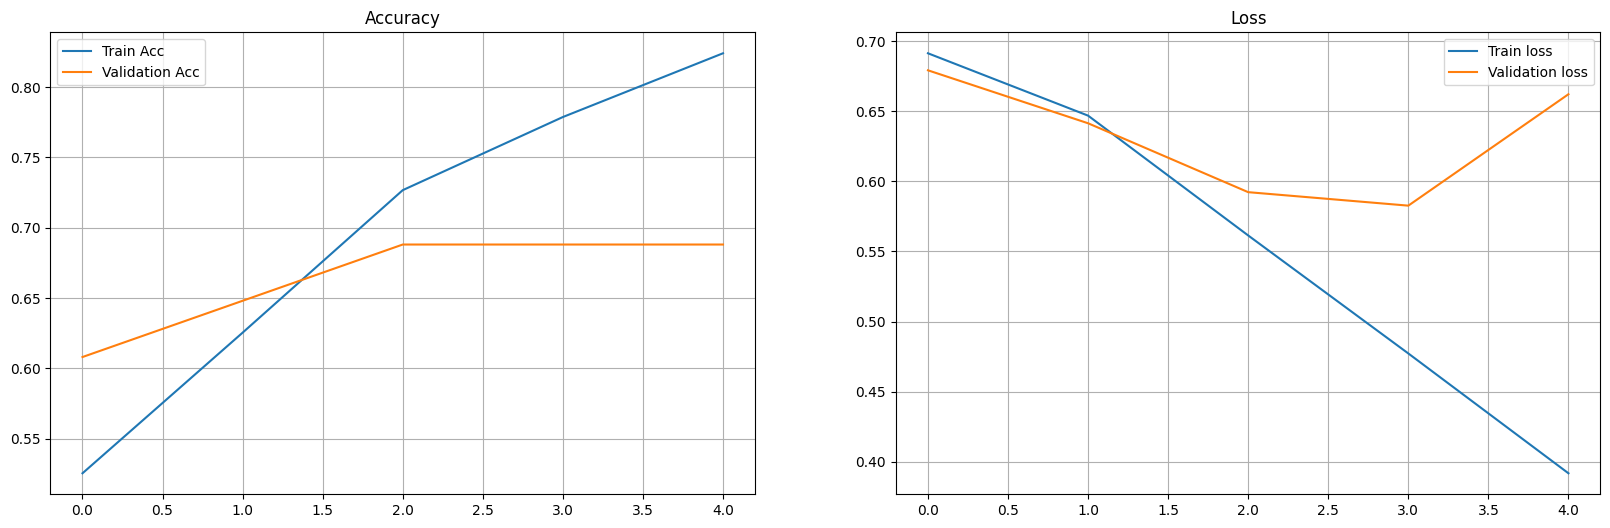

In [ ]:


fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()



In [ ]:
def predict_text(text):
        word_seq = np.array([vocab[word] for word in text.split()
                         if word in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())

index = 30
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

also there are combos like a burger fries and beer for 23 which is a decent deal
Actual sentiment is  : 1
Predicted sentiment is negative with a probability of 0.948014959692955


In [ ]:
import torch
import torch.nn as nn

class SentimentLSTMWithAttention(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5):
        super(SentimentLSTMWithAttention, self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # Embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim,
                            num_layers=no_layers, batch_first=True)

        # Attention mechanism
        self.attention = nn.Linear(hidden_dim, 1)

        # Dropout layer
        self.dropout = nn.Dropout(drop_prob)

        # Linear and sigmoid layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)

        # Embeddings and LSTM output
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # Attention mechanism
        attention_scores = self.attention(lstm_out).squeeze(-1)
        attention_weights = torch.nn.functional.softmax(attention_scores, dim=1)
        context = torch.bmm(attention_weights.unsqueeze(1), lstm_out).squeeze(1)

        # Dropout and fully connected layer
        out = self.dropout(context)
        out = self.fc(out)

        # Sigmoid function
        sig_out = self.sig(out)

        return sig_out, hidden

    def init_hidden(self, batch_size):
        # Initializes the hidden state
        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        hidden = (h0, c0)
        return hidden

In [ ]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()



    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '/content/model/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.3362230588992437 val_loss : 0.6528179466724395
train_accuracy : 84.93333333333334 val_accuracy : 68.8
Validation loss decreased (inf --> 0.652818).  Saving model ...
Epoch 2
train_loss : 0.22871657311916352 val_loss : 0.8335126161575317
train_accuracy : 91.86666666666666 val_accuracy : 69.19999999999999
Epoch 3
train_loss : 0.16113451321919758 val_loss : 1.2666452169418334
train_accuracy : 94.66666666666667 val_accuracy : 68.8
Epoch 4
train_loss : 0.5707809943705797 val_loss : 0.8003474354743958
train_accuracy : 91.86666666666666 val_accuracy : 67.60000000000001
Epoch 5
train_loss : 0.09977662786841393 val_loss : 0.920078694820404
train_accuracy : 97.2 val_accuracy : 70.0


In [ ]:
def predict_text(text):
        word_seq = np.array([vocab[word] for word in text.split()
                         if word in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())

index = 30
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

also there are combos like a burger fries and beer for 23 which is a decent deal
Actual sentiment is  : 1
Predicted sentiment is negative with a probability of 0.9996976732218172


In [ ]:
import torch
import torch.nn as nn

class SentimentRNN(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5):
        super(SentimentRNN, self).__init()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and RNN layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # RNN
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=self.hidden_dim,
                            num_layers=no_layers, batch_first=True, dropout=drop_prob)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)
        # embeddings and rnn_out
        embeds = self.embedding(x)
        rnn_out, hidden = self.rnn(embeds, hidden)

        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully connected layer
        out = self.dropout(rnn_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1]  # get the last batch of labels

        # return the last sigmoid output and hidden state
        return sig_out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes the hidden state '''
        # Create a new tensor with the size num_layers x batch_size x hidden_dim,
        # initialized to zero, for the hidden state of RNN
        hidden = torch.zeros(self.no_layers, batch_size, self.hidden_dim)
        return hidden

In [ ]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()



    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '/content/model/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.09271270185708999 val_loss : 0.898810613155365
train_accuracy : 97.73333333333333 val_accuracy : 68.4
Validation loss decreased (inf --> 0.898811).  Saving model ...
Epoch 2
train_loss : 0.06327508476873239 val_loss : 0.9301190853118897
train_accuracy : 98.13333333333333 val_accuracy : 71.2
Epoch 3
train_loss : 0.05183173784365257 val_loss : 1.096046769618988
train_accuracy : 98.66666666666667 val_accuracy : 69.6
Epoch 4
train_loss : 0.032213698017100494 val_loss : 1.0101172208786011
train_accuracy : 99.46666666666667 val_accuracy : 69.6
Epoch 5
train_loss : 0.0267258416240414 val_loss : 1.1496695518493651
train_accuracy : 99.6 val_accuracy : 69.6


In [ ]:
def predict_text(text):
        word_seq = np.array([vocab[word] for word in text.split()
                         if word in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())

index = 30
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

also there are combos like a burger fries and beer for 23 which is a decent deal
Actual sentiment is  : 1
Predicted sentiment is negative with a probability of 0.9992295456468128
